In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.stattools import adfuller
import yfinance as yf
import talib
#import quantsbin.derivativepricing as qbdp


ModuleNotFoundError: No module named 'talib'

P-Value: 5.490863048452156e-05


<AxesSubplot:xlabel='Date'>

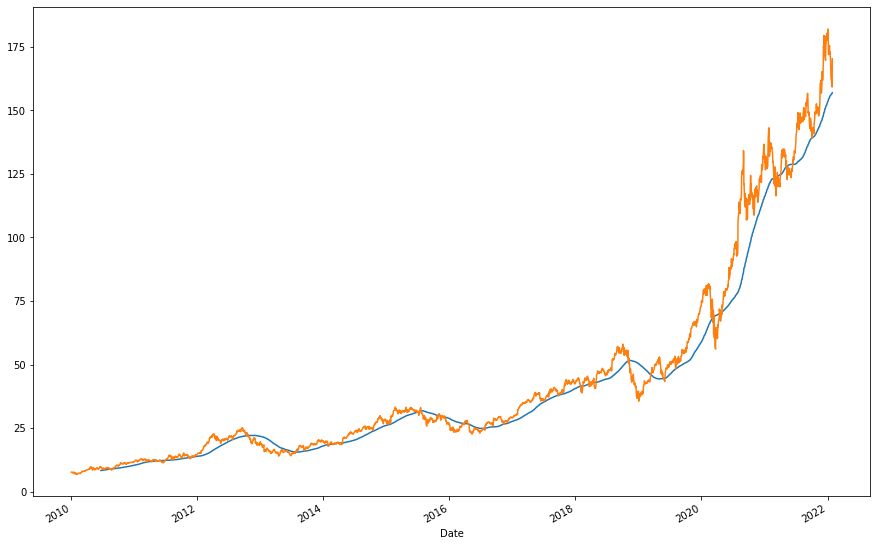

In [2]:

ticker  = yf.download('AAPL', start = '2010-01-03', end = '2022-01-30', progress=False)['Close']

sma = talib.SMA(ticker, 50)

#sma = sma.dropna()

series = sma[49:]/ticker[49:]

print(f'P-Value: {adfuller(series)[1]}')

sma[49:].plot(figsize=(15,10))
ticker.plot()

In [9]:

def test(series, sma):
    
    in_position = False
    initial_cash = 100000
    cash = 100000
    spent = 0
    diff = 0
    profit_loss = [initial_cash]
    
    for s, ma in zip(series, sma):
        
        if s < ma:
            diff = ma - s
            if not in_position:
                in_position = True
                #print(f'Buy: ${s}')
                spent += s
                cash -= s
                profit_loss.append(cash)
            else:
                if ma - s > 1.5*diff:
                    #print(f'Deep Buy: ${s}')
                    spent += s
                    cash -= s
                    profit_loss.append(cash)
                else:
                    profit_loss.append(profit_loss[-1])
        else:
            
            if in_position:
                #print(f'Sell: ${s}')
                spent -= s
                cash += s
                diff = 0
                in_position = False
                profit_loss.append(cash)
            else:
                profit_loss.append(profit_loss[-1])
                
                
    return profit_loss


p_l = test(ticker, sma)

100052.65964221954